In [1]:
import pandas as pd #Linear algebra
import numpy as np #read df
import matplotlib.pyplot as plt #visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin  # To create new classes
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold,
                                     cross_val_score, GridSearchCV,
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
     



In [2]:
df=pd.read_csv("glass.csv")


In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#finding missing values
df.isna().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [ ]:
df.columns


In [9]:
#dropping the missing values permanently becuase there are so many missin values so drop that records

df.dropna(inplace=True)

In [11]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [13]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

In [15]:
#changing the data type of type column as it is folat
df['Type']=df['Type'].astype(int)

In [17]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int32
dtype: object

In [19]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
#unique values in Type column
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [23]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [25]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [27]:
df.nunique() #no. of unique values in each column

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [29]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [31]:
features=df.columns[:-1].tolist() #no. of rows excluding the last column

In [33]:
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [35]:
#MinMaxScaler technique
for f in features:
    df[f]= (df[f]-df[f].min())/(df[f].max()-df[f].min())

In [37]:
df[f]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
209    0.0
210    0.0
211    0.0
212    0.0
213    0.0
Name: Fe, Length: 214, dtype: float64

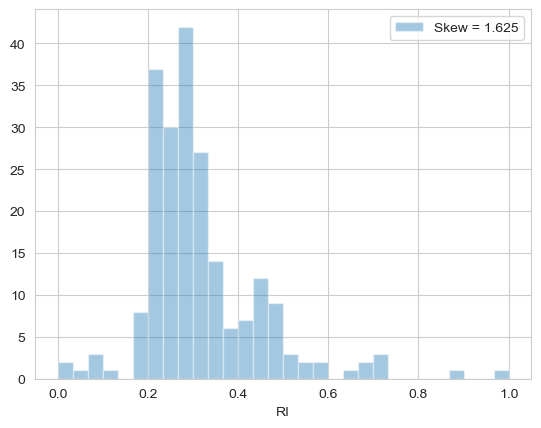

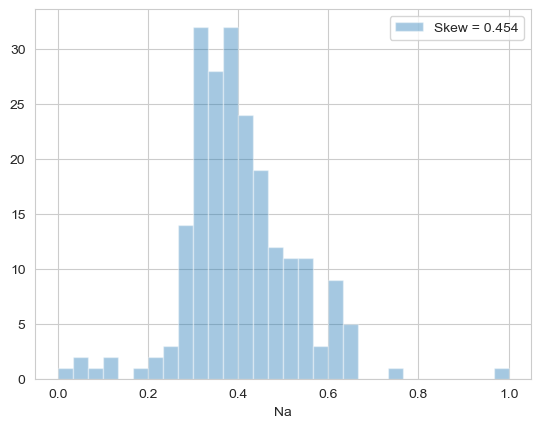

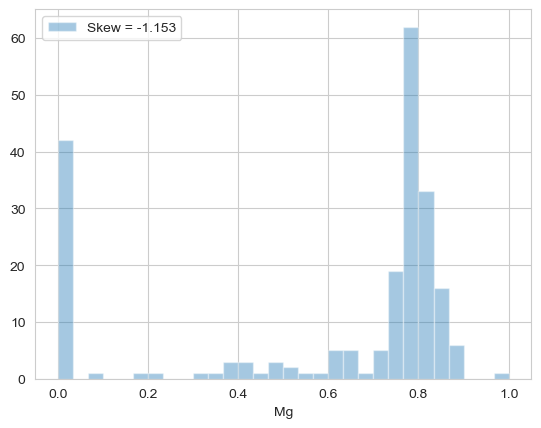

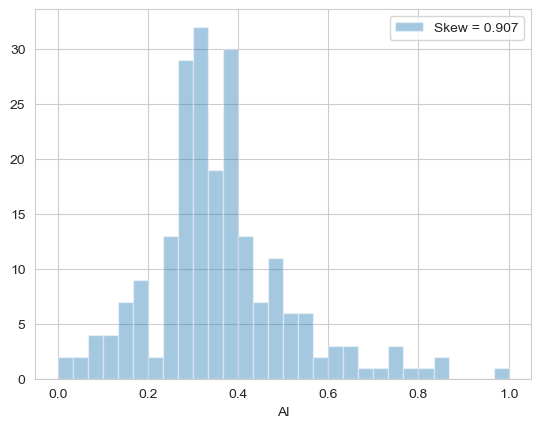

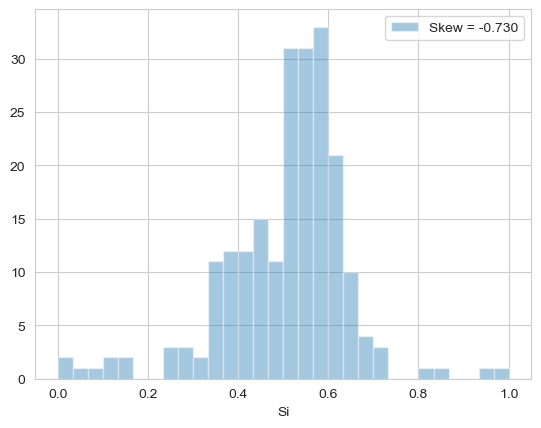

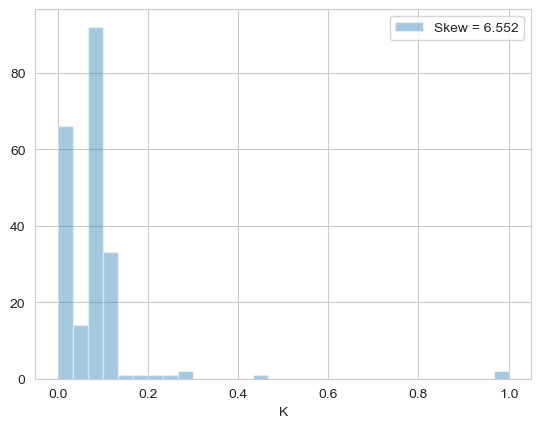

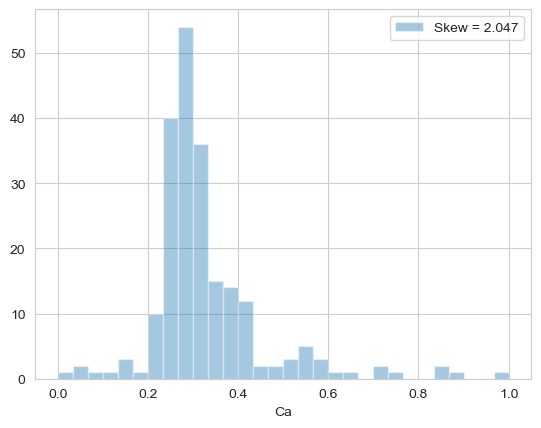

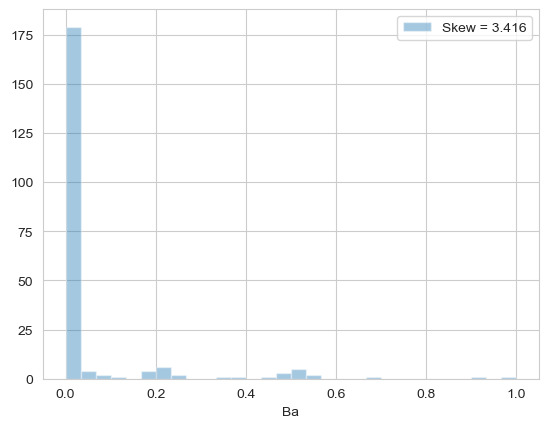

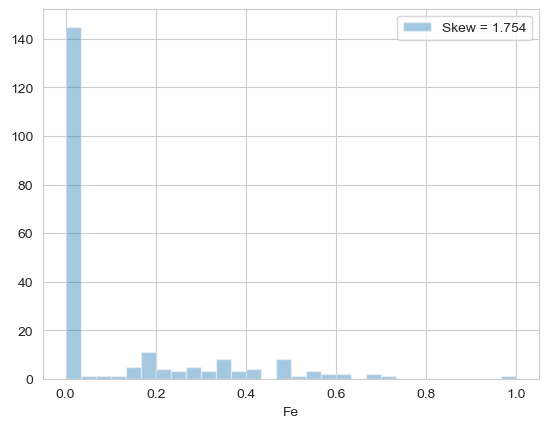

In [39]:
#Visulaization of each column

for feat in features:
    skew=df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()
     


<Axes: >

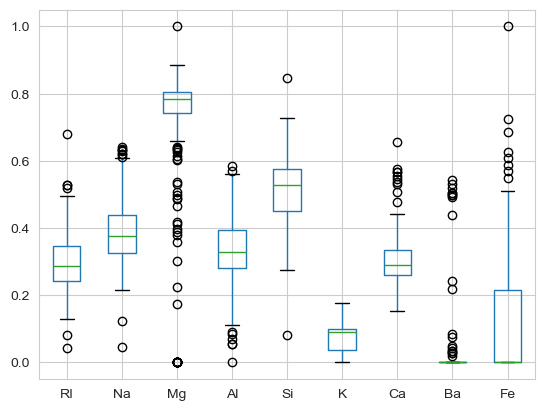

In [493]:
#Outlier Detection
df[features].boxplot()

In [43]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))
     

The dataset contains 14 observations with more than 2 outliers


<Axes: >

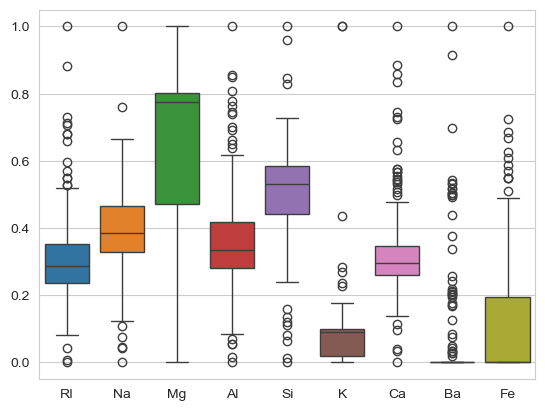

In [45]:
sns.boxplot(df[features])

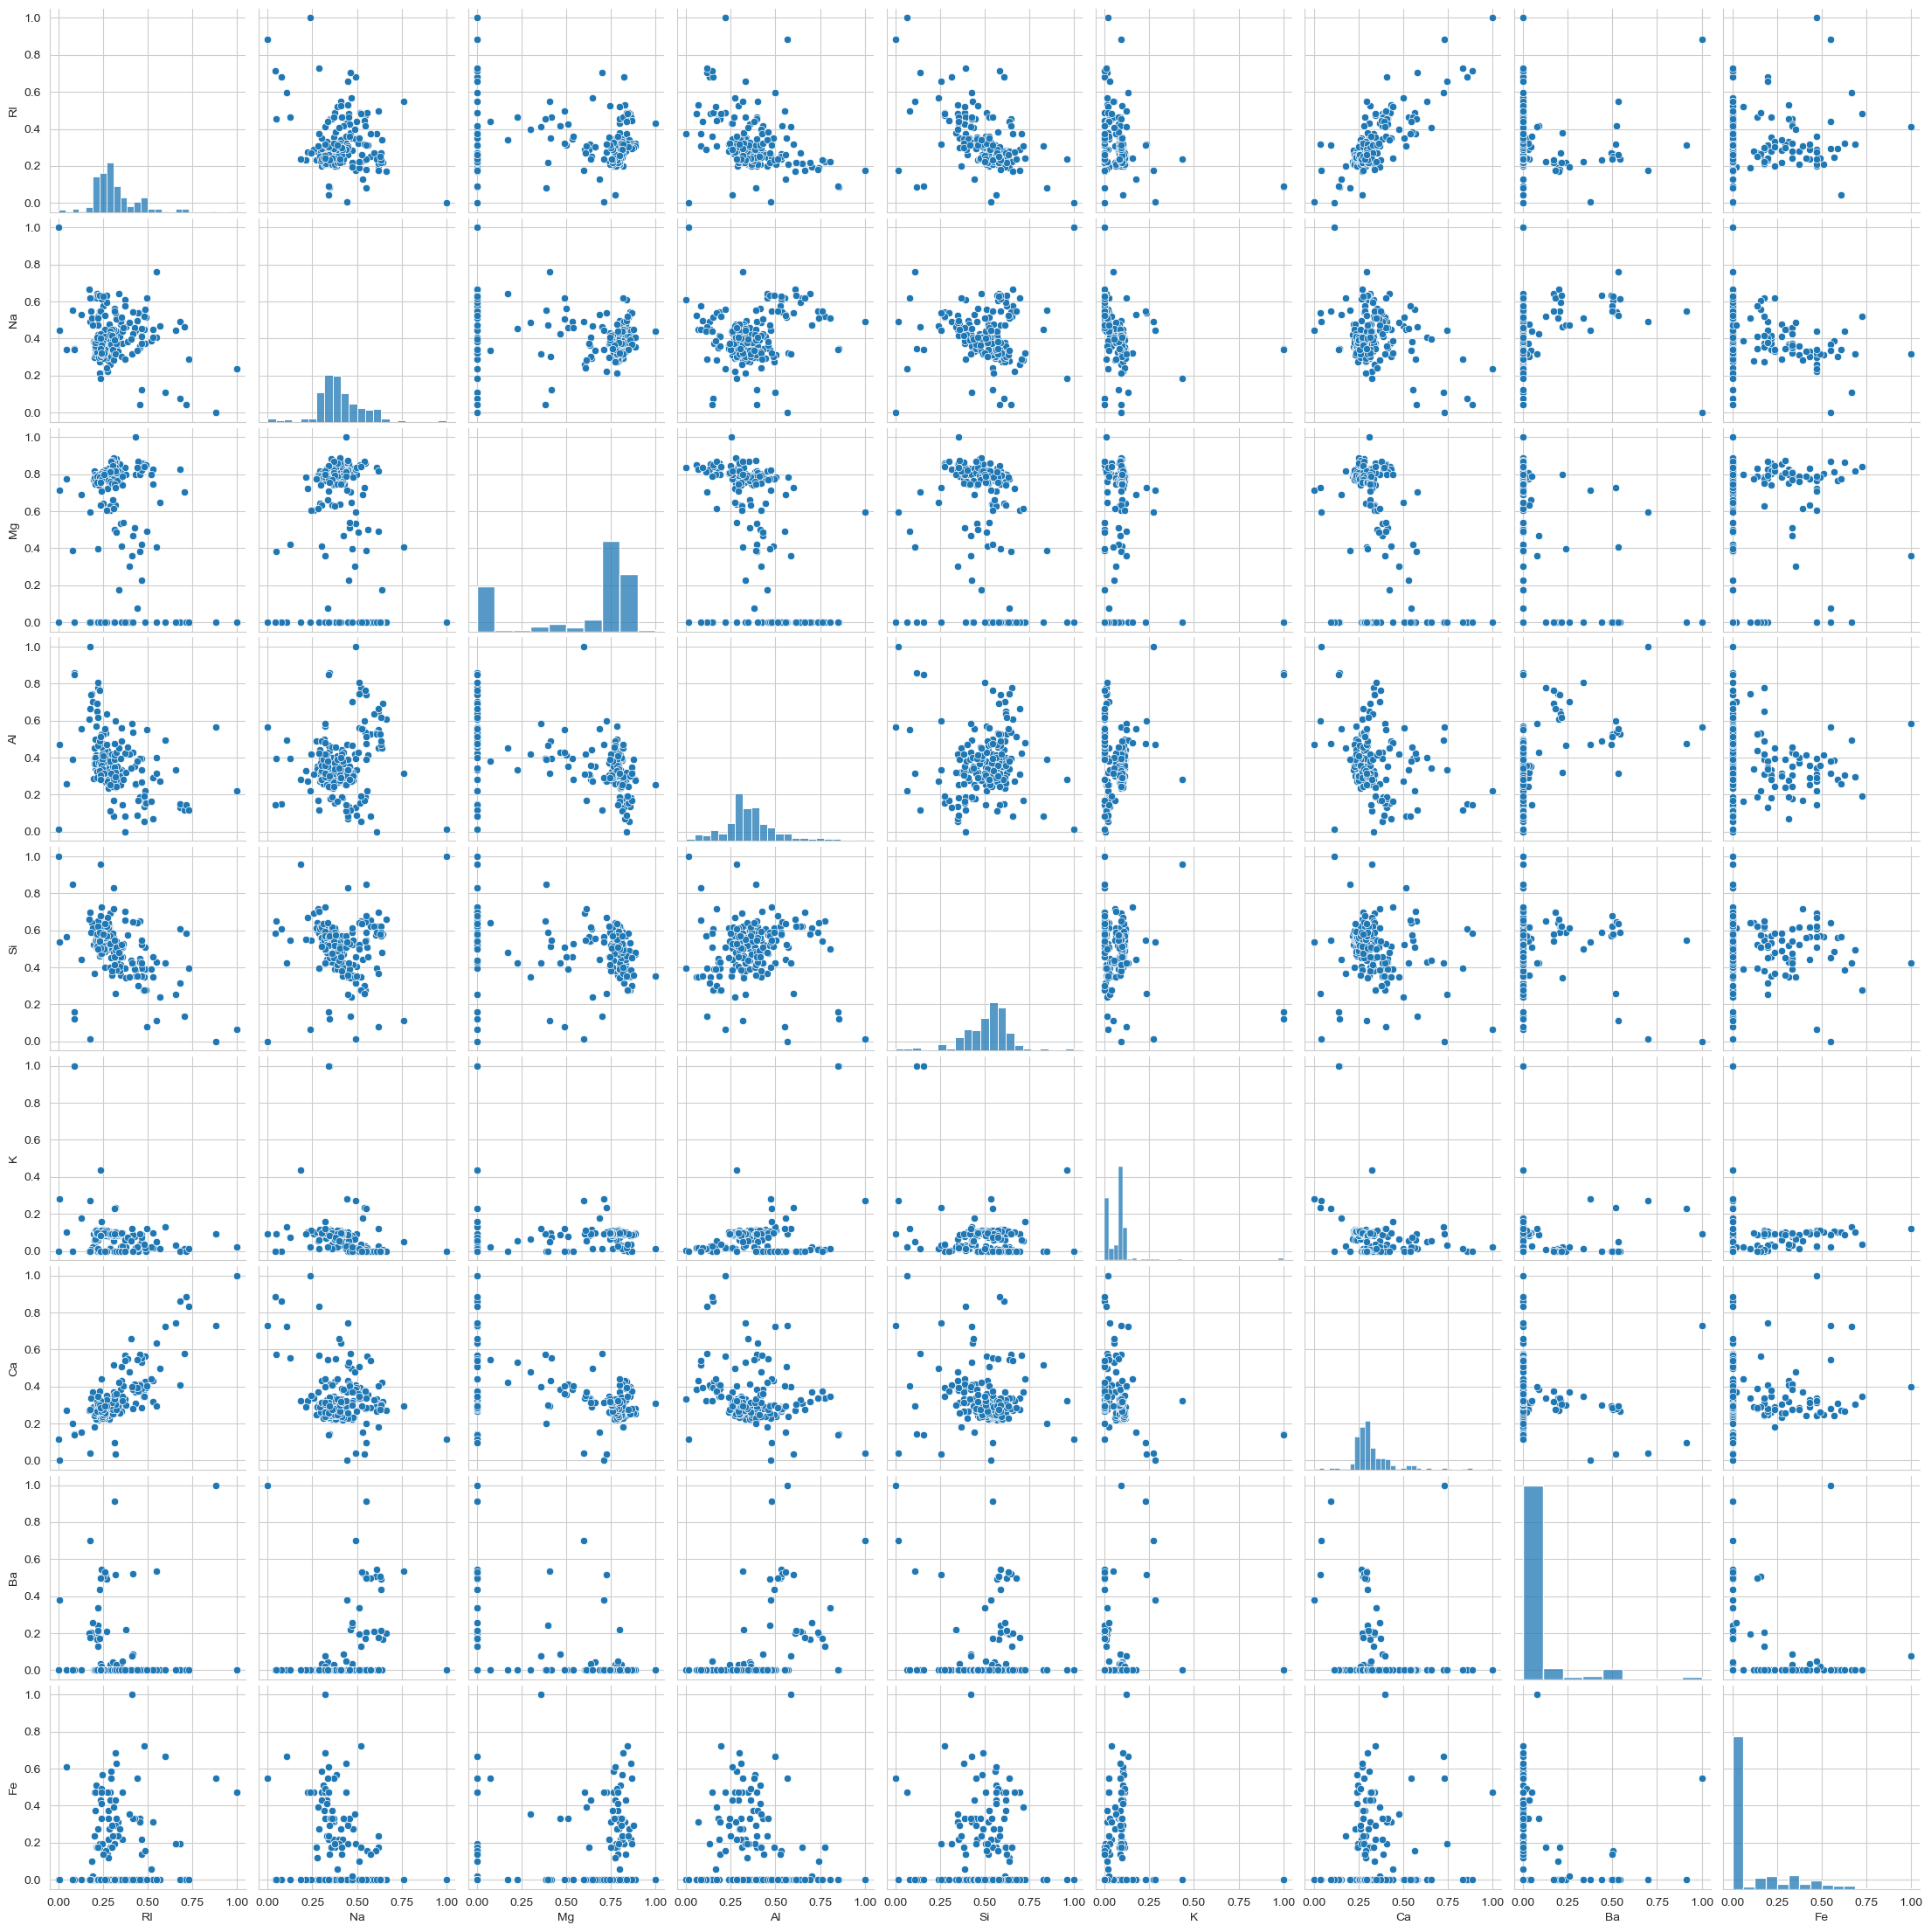

In [47]:
#correlation in the featurs
sns.pairplot(df[features])
plt.show()

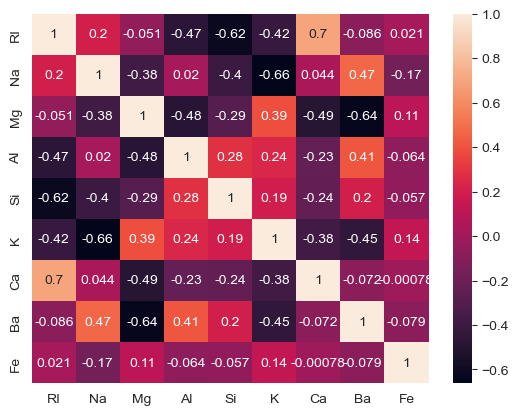

In [501]:
corr=df[features].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [49]:
outlier_indices=outlier_hunt(df[features])
df=df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


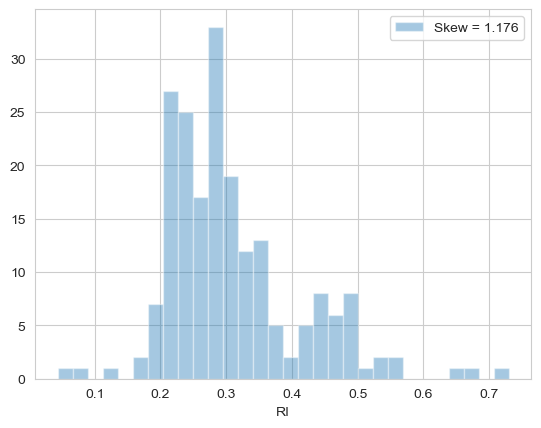

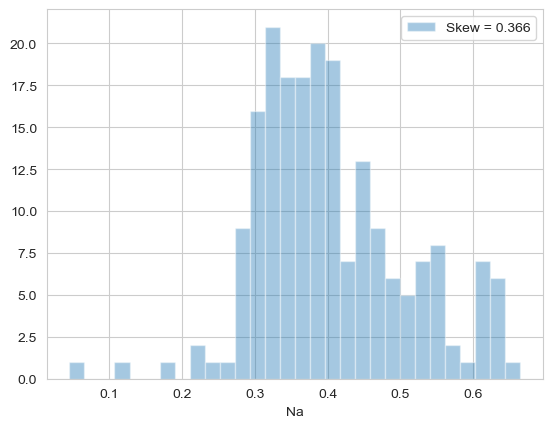

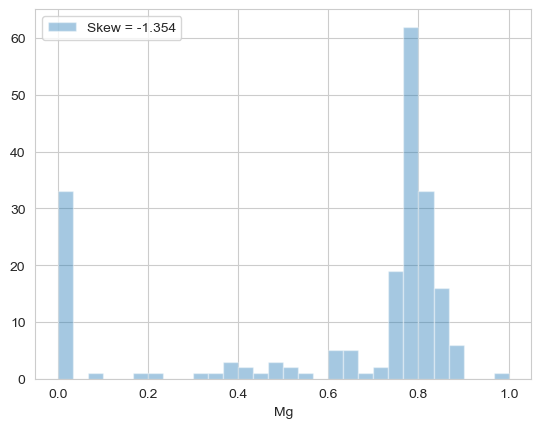

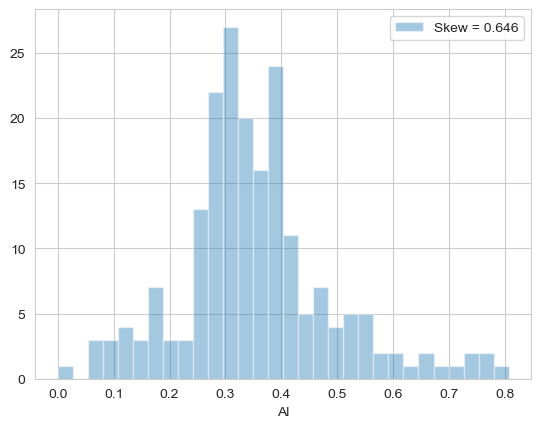

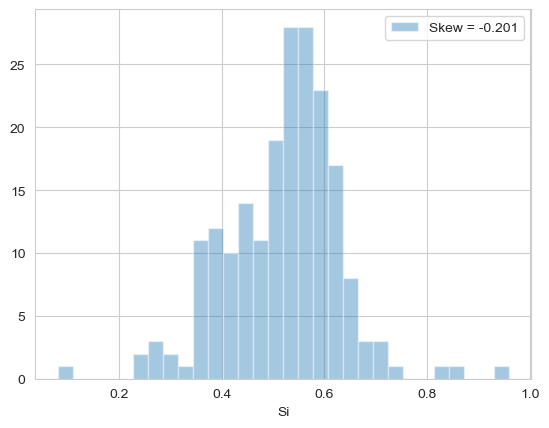

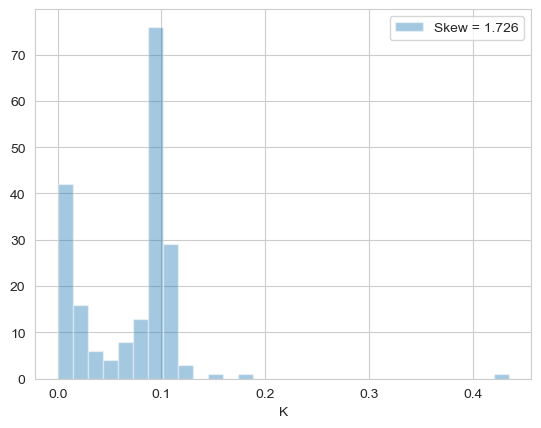

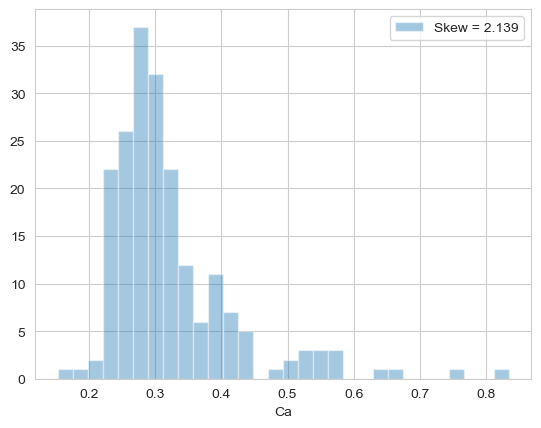

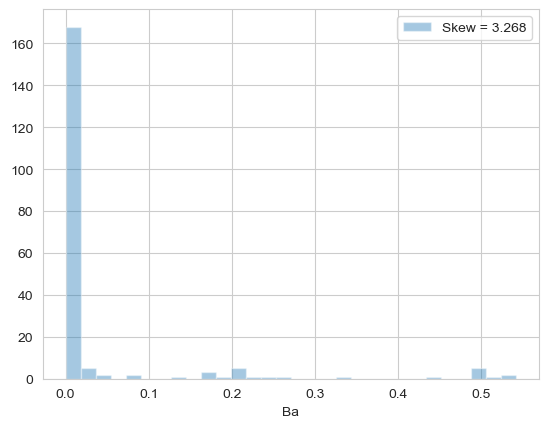

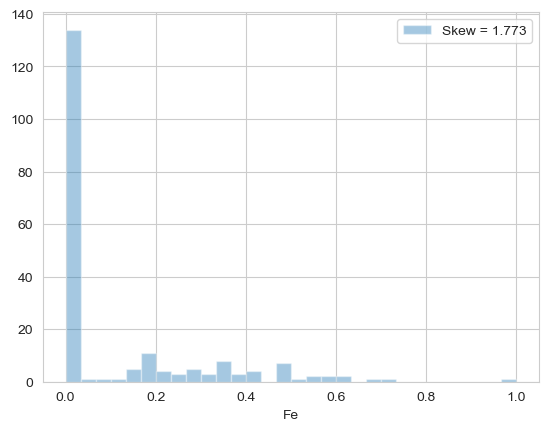

In [51]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
#Spliting of data into x and y
X = df[features]
y = df['Type']
# set a seed and a test size for splitting the dataset
seed = 7
test_size = 0.2

x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)
     

In [68]:
#Implementing Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[300,400,500,600,700,800],
              'max_depth':[5,6,7,8,9,10] ,
              'n_jobs':[-1],
              'max_features':[3,4,5]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [70]:
#grid=GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5],
                         'n_estimators': [300, 400, 500, 600, 700, 800],
                         'n_jobs': [-1]},
             scoring='accuracy')

In [71]:
best_param= grid_search.best_params_
best_param

{'max_depth': 7, 'max_features': 3, 'n_estimators': 500, 'n_jobs': -1}

In [84]:
best_model = grid_search.best_estimator_

In [82]:
y_pred= best_model.predict(X_test)


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
     

0.8

In [88]:
from sklearn.metrics import confusion_matrix


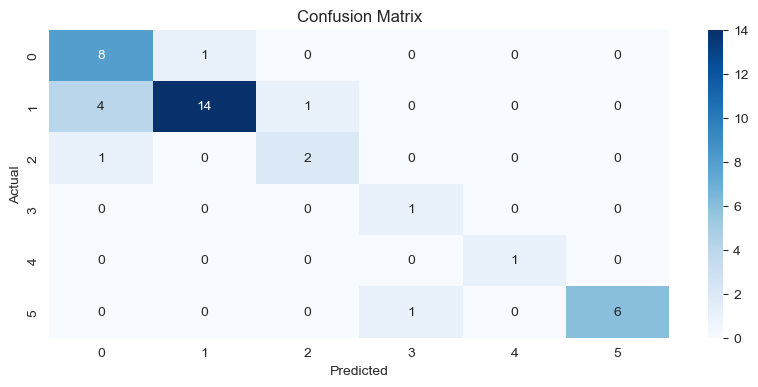

In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.7859
Recall: 0.8583
F1 Score: 0.8012


Explain Bagging and Boosting methods. How is it different from each other.


Bagging and boosting are ensemble learning techniques. Bagging (Bootstrap Aggregating) reduces variance by averaging multiple models, while boosting reduces bias by combining weak learners sequentially to form a strong learner.

